## Phase I: Individual Chromosome Detection

In [2]:
# import necessary libraries
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn

In [3]:
normal = pd.read_csv('Data/normal.csv' ,delimiter=',', encoding='UTF-8')
abnormal = pd.read_csv('Data/number_abnormalities.csv',delimiter=',', encoding='UTF-8')
str_abnormal = pd.read_csv('Data/structural_abnormalities.csv',delimiter=',', encoding='UTF-8')

pd.set_option('display.max_columns', None)

In [4]:
normal.head()

,filename,chromosome numbers,description
0,104011.jpg,46,NaN
1,104013.jpg,46,NaN
2,104022.jpg,46,NaN
3,104023.jpg,46,NaN
4,104024.jpg,46,NaN


In [8]:
normal.describe()

,chromosome numbers
count,4893.000000
mean,45.969140
std,0.286069
min,43.000000
25%,46.000000
50%,46.000000
75%,46.000000
max,50.000000


In [7]:
len(normal)

4893

In [9]:
abnormal.head()

,filename,chromosome numbers,description (abnormal chromosome-pair)
0,103081.jpg,47,unknow
1,103092.jpg,47,X
2,103131.jpg,47,12
3,1050431.jpg,47,18
4,1050432.jpg,47,18


In [5]:
len(abnormal)

59

In [10]:
str_abnormal.head()

,filename,chromosome numbers,description (abnormal chromosome-pair)
0,1050761.jpg,46,8
1,1050762.jpg,46,8
2,1050763.jpg,46,8
3,1050764.jpg,46,8
4,1056995.jpg,46,"8,17"


In [6]:
len(str_abnormal)

50

### Analysis of file data

In [11]:
normal.isnull().sum()
abnormal.isnull().sum()
str_abnormal.isnull().sum()

filename                                  0
chromosome numbers                        0
description (abnormal chromosome-pair)    0
dtype: int64

In [12]:
def normal_count_df(normal, column_name, sort=True):
    value_count = normal[column_name].value_counts(sort=sort).reset_index().rename(columns={column_name:"Value Count","index":column_name}).set_index(column_name)
    value_count["Percentage"] = normal[column_name].value_counts(sort=sort,normalize=True)*100
    value_count = value_count.reset_index()
    return value_count

In [13]:
def abnormal_count_df(abnormal, column_name, sort=True):
    value_count = abnormal[column_name].value_counts(sort=sort).reset_index().rename(columns={column_name:"Value Count","index":column_name}).set_index(column_name)
    value_count["Percentage"] = abnormal[column_name].value_counts(sort=sort,normalize=True)*100
    value_count = value_count.reset_index()
    return value_count

In [14]:
def str_abnormal_count_df(str_abnormal, column_name, sort=True):
    value_count = str_abnormal[column_name].value_counts(sort=sort).reset_index().rename(columns={column_name:"Value Count","index":column_name}).set_index(column_name)
    value_count["Percentage"] = str_abnormal[column_name].value_counts(sort=sort,normalize=True)*100
    value_count = value_count.reset_index()
    return value_count

In [15]:
normal_count = normal_count_df(normal, "chromosome numbers" )
display(normal_count)

,chromosome numbers,Value Count,Percentage
0,46,4555,93.092172
1,45,231,4.721030
2,47,92,1.880237
3,44,10,0.204374
4,48,2,0.040875
5,49,1,0.020437
6,43,1,0.020437
7,50,1,0.020437


In [16]:
abnormal_count = abnormal_count_df(abnormal, "chromosome numbers")
display(abnormal_count)

,chromosome numbers,Value Count,Percentage
0,47,37,62.711864
1,45,11,18.644068
2,46,8,13.559322
3,48,1,1.694915
4,44,1,1.694915
5,39,1,1.694915


In [17]:
str_abnormal_count = str_abnormal_count_df(str_abnormal, "chromosome numbers")
str_abnormal_count.index = str_abnormal_count["chromosome numbers"]
display(str_abnormal_count)

,chromosome numbers,Value Count,Percentage
chromosome numbers,,,
46,46,28,56.0
45,45,19,38.0
47,47,3,6.0


<BarContainer object of 8 artists>

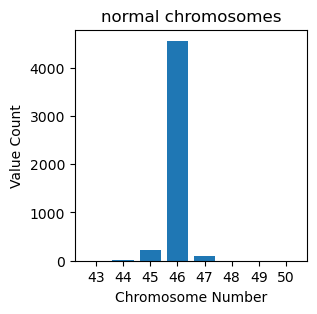

In [20]:
values = normal_count['Value Count']
chnumber = list(normal_count["chromosome numbers"])
plt.figure(figsize=(3,3))
plt.xlabel('Chromosome Number')
plt.ylabel('Value Count')
plt.title('normal chromosomes')
plt.xticks(chnumber)
plt.bar(chnumber , values)

<BarContainer object of 6 artists>

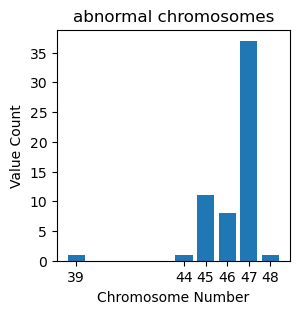

In [21]:
values = abnormal_count['Value Count']
chnumber = list(abnormal_count["chromosome numbers"])
plt.figure(figsize=(3,3))
plt.xlabel('Chromosome Number')
plt.ylabel('Value Count')
plt.title('abnormal chromosomes')
plt.xticks(chnumber)
plt.bar(chnumber , values)

<BarContainer object of 3 artists>

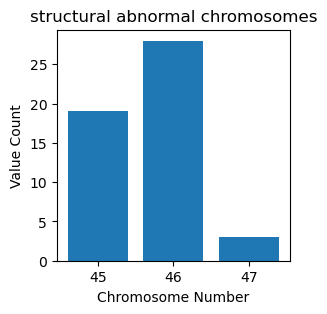

In [22]:
values = str_abnormal_count['Value Count']
chnumber = list(str_abnormal_count["chromosome numbers"])
plt.figure(figsize=(3,3))
plt.xlabel('Chromosome Number')
plt.ylabel('Value Count')
plt.title('structural abnormal chromosomes')
plt.xticks(chnumber)
plt.bar(chnumber , values)

<BarContainer object of 8 artists>

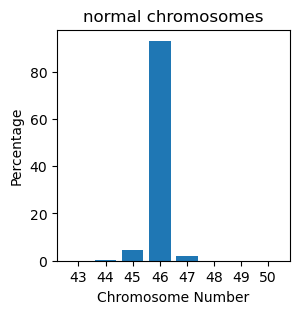

In [24]:
percentage = normal_count['Percentage']
chnumber = list(normal_count["chromosome numbers"])
plt.figure(figsize=(3,3))
plt.xlabel('Chromosome Number')
plt.ylabel('Percentage')
plt.title('normal chromosomes')
plt.xticks(chnumber)
plt.bar(chnumber , percentage)

<BarContainer object of 6 artists>

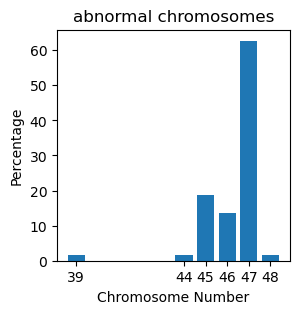

In [25]:
percentage = abnormal_count['Percentage']
chnumber = list(abnormal_count["chromosome numbers"])
plt.figure(figsize=(3,3))
plt.xlabel('Chromosome Number')
plt.ylabel('Percentage')
plt.title('abnormal chromosomes')
plt.xticks(chnumber)
plt.bar(chnumber , percentage)

<BarContainer object of 3 artists>

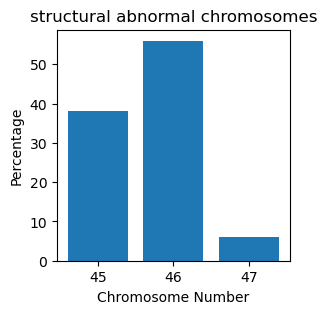

In [26]:
percentage = str_abnormal_count['Percentage']
chnumber = list(str_abnormal_count["chromosome numbers"])
plt.figure(figsize=(3,3))
plt.xlabel('Chromosome Number')
plt.ylabel('Percentage')
plt.title('structural abnormal chromosomes')
plt.xticks(chnumber)
plt.bar(chnumber , percentage)

### Loading metaphase images

In [27]:
import os
import cv2
import sys
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid

import warnings
warnings.filterwarnings("ignore")
import matplotlib.patches as patches

In [28]:
def show_anns(anns, axes=None):
    if len(anns) == 0:
        return
    if axes:
        ax = axes
    else:
        ax = plt.gca()
        ax.set_autoscale_on(False)
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0],m.shape[1],3))
        color_mask = np.random.random((1,3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.8)))

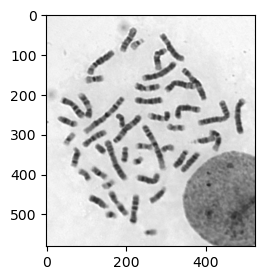

In [60]:
# reading the first image
img = cv2.imread("Data/24_chromosomes_object/JEPG/103064.jpg")
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.show()

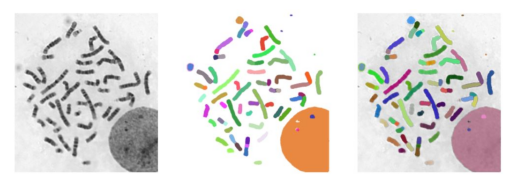

In [34]:
path0='Data/24_chromosomes_object/JEPG/103064.jpg'
image = cv2.imread(path0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

masks1 = mask_generator1.generate(image)

fig, axs = plt.subplots(1,3,figsize=(12,4))
axs[0].imshow(image)
axs[2].imshow(image) 
show_anns(masks1,axs[1])
show_anns(masks1,axs[2])

axs[0].axis('off')
axs[1].axis('off')    
axs[2].axis('off')    
plt.show()

### Generating segmentation masks

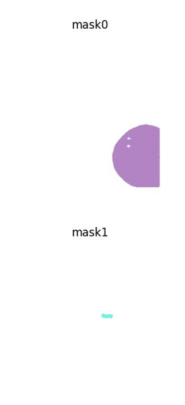

In [50]:
count = 0
for i in range(len(masks1)):
    plt.figure(figsize=(3,3))
    plt.imshow(bgw)
    show_anns([masks1[i]])
    plt.title(f'mask{i}')
    plt.axis('off')  
    plt.show()  
    count+=1
    
    # display first 2 masks for demonstration
    if count==2:
        break

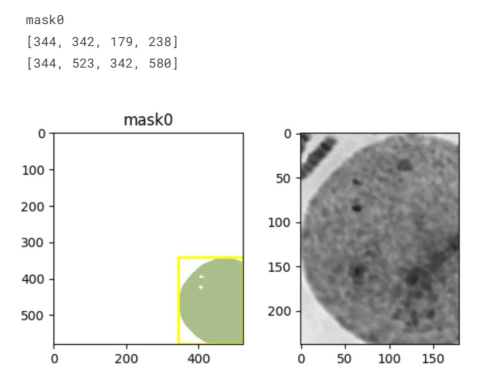

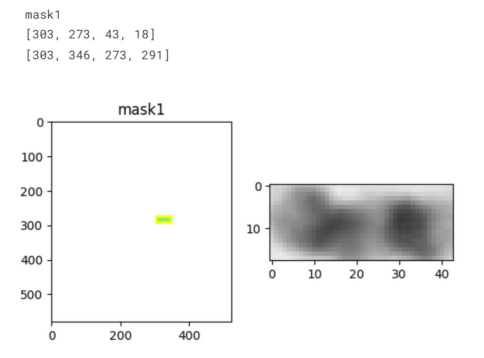

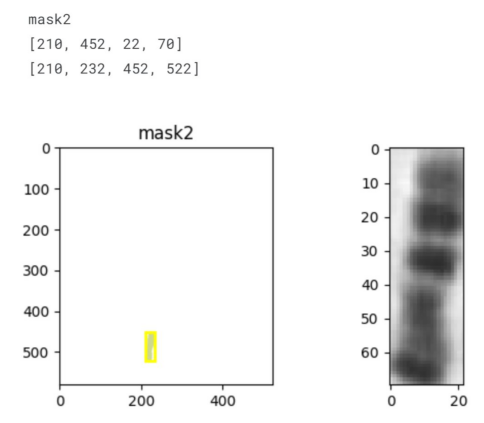

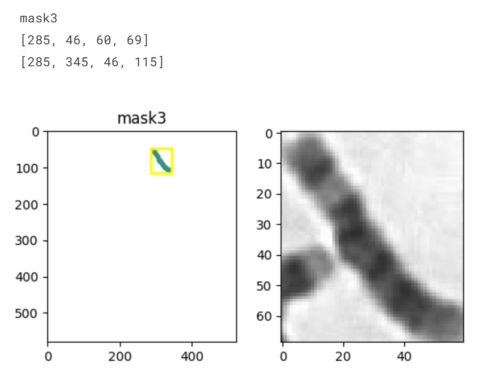

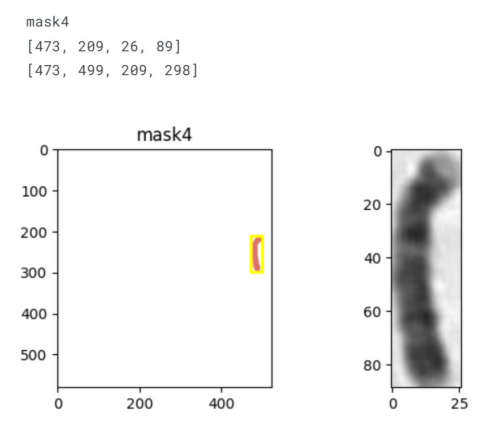

In [87]:
# show slices of masks
count = 0
for i in range(len(masks1)):
    fig, ax = plt.subplots(1,2,figsize=(6,3))
    ax[0].imshow(bgw)
    masksi=masks1[i]
    box0=masksi['bbox']
    xc,yc,w,h = box0
    x0=xc
    y0=yc
    x1=xc+w
    y1=yc+h
    print(f'mask{i}')
    print(box0)
    print([x0,x1,y0,y1])
    rect = patches.Rectangle( (xc,yc),w,h, linewidth=2, edgecolor='yellow', fill=False)
    
    boximage=image[y0:y1,x0:x1,:]
    cv2.imwrite(str(i).zfill(3)+'.png', boximage)
    
    show_anns([masksi],ax[0])
    ax[0].add_patch(rect)
    ax[1].imshow(boximage)
    ax[0].set_title(f'mask{i}') 
    plt.show() 
    
    count+=1
    # display only first five masks for demonstration purpose
    if count == 5:
        break

### Comparing with annotation information

In [88]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

In [89]:
patha0='Data/24_chromosomes_object/annotations/103064.xml'
image = cv2.imread(path0)
tree = ET.parse(patha0)

In [90]:
for elem in tree.iter():
    if 'object' in elem.tag:
        for attr in list(elem):
            if 'name' in attr.tag:
                name = attr.text
            if 'bndbox' in attr.tag:
                for dim in list(attr):
                    if 'xmin' in dim.tag:
                        xmin = int(round(float(dim.text)))
                    if 'ymin' in dim.tag:
                        ymin = int(round(float(dim.text)))
                    if 'xmax' in dim.tag:
                        xmax = int(round(float(dim.text)))
                    if 'ymax' in dim.tag:
                        ymax = int(round(float(dim.text)))

                cv2.rectangle(image,(xmin,ymin),(xmax,ymax), (255,0,0),1)
                cv2.putText(image,name,(xmin+10, ymin+15),
                        cv2.FONT_HERSHEY_SIMPLEX, 1e-3*image.shape[0],(255,0,0),1)

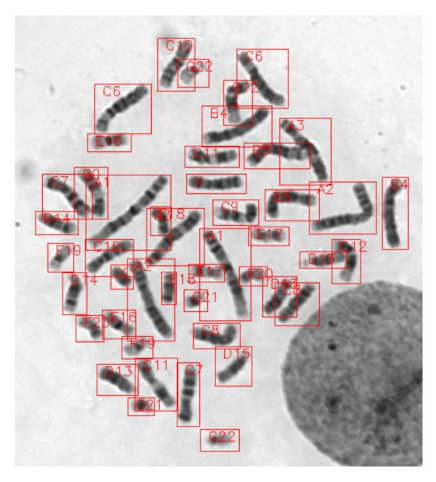

In [93]:
plt.figure(figsize=(12,12))
plt.imshow(image)
plt.axis('off') 
plt.show()

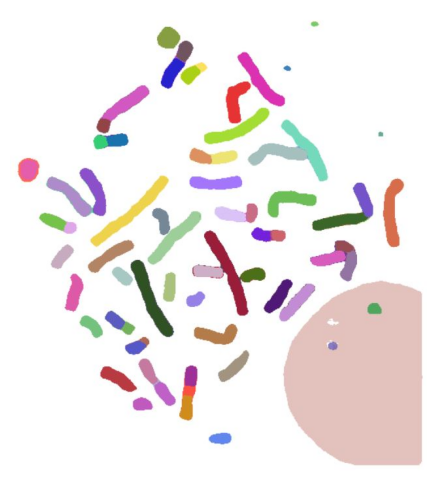

In [95]:
fig, axs = plt.subplots(figsize=(12,12))
show_anns(masks1,axs)
axs.axis('off')
plt.show()
fig.savefig('save.png', bbox_inches='tight')

## Phase II : Chromosome Classification

### Creating CSV file for Image labels

In [99]:
# creating labels for all classes
l1=[];l2=[]
for i in range(1,120):
    for j in range(1,24):
        name1 = str(i)+' '+str(j)+'a.bmp'
        name2 = str(i)+' '+str(j)+'b.bmp'
        l1.append(name1)
        l2.append(i)
        l1.append(name2)
        l2.append(i)

In [100]:
# creating dataframe
d = {"name" : pd.Series(l1),"label" : pd.Series(l2)}
df = pd.DataFrame(d)
df

,name,label
0,1 1a.bmp,1
1,1 1b.bmp,1
2,1 2a.bmp,1
3,1 2b.bmp,1
4,1 3a.bmp,1
...,...,...
5469,119 21b.bmp,119
5470,119 22a.bmp,119
5471,119 22b.bmp,119
5472,119 23a.bmp,119


In [101]:
df['label'] = df['label'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5474 entries, 0 to 5473
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    5474 non-null   object
 1   label   5474 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 85.7+ KB


In [102]:
# converting dataframe to csv file
df.to_csv('df.csv')

### Summarised Objective:
Dataset contains 119 classes of chromosomes with each class having all 23 pairs of chromosomes. So, the main folder contains 119 subfolders with each folder having 23 X 2 = 46 image files in pairs. Objective is to classify a given chromosome as belonging to a particular class with input as an image containing multiple pairs of chromosomes which might be overlapping or different orientations and profiles. Object detection will first capture all the images separately with bounding boxes and then each image is classified to be belonging to a particular class. Finally the count of chromosomes for each class will be displayed as the output.

### Creating annotations for all classes

In [103]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset
from skimage import io

In [104]:
# defining a class for loading outr dataset
class chromosomes(Dataset):
    def __init__(self,csv_file,root_dir,transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.annotations)
    
    def __getitem__(self,index):
        img_path = os.path.join(self.root_dir,self.annotations.iloc[index,0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index,1]))
    
        if self.transform:
            image = self.transform(image)
            
        return (image,y_label)

In [105]:
import torch.nn as nn # all neural networks
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import DataLoader

In [106]:
# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [107]:
# hyperparameters
in_channel = 3
num_classes = 119
learning_rate = 1e-3
batch_size = 32
num_epochs = 20

In [108]:
# loading the data
dataset = chromosomes(csv_file = "df.csv", root_dir = 'chr_images', transform = transforms.ToTensor())
train_set, test_set = torch.utils.data.random_split(dataset,[5000,474])
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True)

In [109]:
# model
model = torchvision.models.googlenet(pretrained=True)
model.to(device)

In [110]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [113]:
# train network
for epoch in range(num_epochs):
    losses=[]
    
    for batch_idx, (data, targets) in enumerate(train_loader):
        # get data to CUDA if possible
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        # forward
        scores = model(data)
        loss = criterion(scores,targets)
        
        losses.append(loss.item())
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        
        # gradient descent or adam step
        optimizer.step()

### Using YOLO with imageai

In [132]:
from imageai.Detection import ObjectDetection  

# instantiating the class  
recognizer = ObjectDetection()  

In [133]:
# defining the paths  
path_model = "yolo-tiny.h5"  
path_input = "input.jpg"  
path_output = "output.jpg"  

In [134]:
# using the setModelTypeAsTinyYOLOv3() function  
recognizer.setModelTypeAsTinyYOLOv3()  

In [135]:
# setting the path of the Model  
recognizer.setModelPath(path_model)  

In [136]:
# loading the model  
recognizer.loadModel()  

# calling the detectObjectsFromImage() function  
recognition = recognizer.detectObjectsFromImage(  
    input_image = path_input,  
    output_image_path = path_output  
    )  

### Image file preprocessing

In [141]:
import os
from os import listdir

l1=[]
for i in os.listdir('Data/chr_images'):
    l1.append(i)
print("List of Chromosome classes:",len(l1))
print(l1)

List of Chromosome classes: 119
['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']



In [147]:
l=[]
for specimen in os.listdir('Data/chr_images'):
    temp = 'Data/chr_images/'+specimen
    for img in os.listdir(temp):
        l.append(img)
        
print("Total (single) chromosome images:",len(l))

Total (single) chromosome images: 5474


In [153]:
for specimen in os.listdir('Data/chr_images'):
    temp = 'Data/chr_images/'+specimen
    l=[]
    for img in os.listdir(temp):
        l.append(img)
    print(temp,':',len(l))
    # all classes have 46 chromosome images each

Data/chr_images/1 : 46
Data/chr_images/10 : 46
Data/chr_images/100 : 46
Data/chr_images/101 : 46
Data/chr_images/102 : 46
Data/chr_images/103 : 46
Data/chr_images/104 : 46
Data/chr_images/105 : 46
Data/chr_images/106 : 46
Data/chr_images/107 : 46
Data/chr_images/108 : 46
Data/chr_images/109 : 46
Data/chr_images/11 : 46
Data/chr_images/110 : 46
Data/chr_images/111 : 46
Data/chr_images/112 : 46
Data/chr_images/113 : 46
Data/chr_images/114 : 46
Data/chr_images/115 : 46
Data/chr_images/116 : 46
Data/chr_images/117 : 46
Data/chr_images/118 : 46
Data/chr_images/119 : 46
Data/chr_images/12 : 46
Data/chr_images/13 : 46
Data/chr_images/14 : 46
Data/chr_images/15 : 46
Data/chr_images/16 : 46
Data/chr_images/17 : 46
Data/chr_images/18 : 46
Data/chr_images/19 : 46
Data/chr_images/2 : 46
Data/chr_images/20 : 46
Data/chr_images/21 : 46
Data/chr_images/22 : 46
Data/chr_images/23 : 46
Data/chr_images/24 : 46
Data/chr_images/25 : 46
Data/chr_images/26 : 46
Data/chr_images/27 : 46
Data/chr_images/28 : 4

### Splitting into train, test, validation datasets

In [162]:
import os
import shutil
import random

def split(class_name):

    # Set the source folder containing your images
    source_folder = r'Data\\chr_images'
    sf1 = os.path.join(source_folder, class_name)

    # Define the root directory where you want to create train, test, and validate folders
    train_folder = os.path.join(r'Split\\train', class_name)
    test_folder = os.path.join(r'Split\\test', class_name)
    validate_folder = os.path.join(r'Split\\validate', class_name)

    # Create the destination directories if they don't exist
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)
    os.makedirs(validate_folder, exist_ok=True)

    # Define the ratio for splitting (e.g., 70% train, 20% test, 10% validate)
    train_ratio = 0.7
    test_ratio = 0.2
    validate_ratio = 0.1

    # Get a list of all image files in the source folder
    temp='Data\\chr_images\\'+class_name
    image_files = [f for f in os.listdir(temp) if f.endswith('.bmp')]

    # Shuffle the list of image files randomly
    random.shuffle(image_files)

    # Calculate the number of images for each set
    total_images = len(image_files)
    num_train = int(total_images * train_ratio)
    num_test = int(total_images * test_ratio)
    num_validate = total_images - num_train - num_test

    # Split the image files into train, test, and validate sets
    train_images = image_files[:num_train]
    test_images = image_files[num_train:num_train + num_test]
    validate_images = image_files[num_train + num_test:]

    # Copy the image files to their respective folders
    for image in train_images:
        source_path = os.path.join(sf1, image)
        destination_path = os.path.join(train_folder, image)
        if os.path.exists(source_path):
            shutil.copy(source_path, destination_path)
        else:
            print(f"Source file not found: {source_path}")

    for image in test_images:
        source_path = os.path.join(sf1, image)
        destination_path = os.path.join(test_folder, image)
        if os.path.exists(source_path):
            shutil.copy(source_path, destination_path)
        else:
            print(f"Source file not found: {source_path}")

    for image in validate_images:
        source_path = os.path.join(sf1, image)
        destination_path = os.path.join(validate_folder, image)
        if os.path.exists(source_path):
            shutil.copy(source_path, destination_path)
        else:
            print(f"Source file not found: {source_path}")

    print(f"Split {total_images} images into {num_train} train, {num_test} test, and {num_validate} validate images.")

In [163]:
# each chromosome class is split into train, test and validation folders 
for i in os.listdir('Data/chr_images'):
    split(i)

Split 46 images into 32 train, 9 test, and 5 validate images.
Split 46 images into 32 train, 9 test, and 5 validate images.
Split 46 images into 32 train, 9 test, and 5 validate images.
Split 46 images into 32 train, 9 test, and 5 validate images.
Split 46 images into 32 train, 9 test, and 5 validate images.
Split 46 images into 32 train, 9 test, and 5 validate images.
Split 46 images into 32 train, 9 test, and 5 validate images.
Split 46 images into 32 train, 9 test, and 5 validate images.
Split 46 images into 32 train, 9 test, and 5 validate images.
Split 46 images into 32 train, 9 test, and 5 validate images.
Split 46 images into 32 train, 9 test, and 5 validate images.
Split 46 images into 32 train, 9 test, and 5 validate images.
Split 46 images into 32 train, 9 test, and 5 validate images.
Split 46 images into 32 train, 9 test, and 5 validate images.
Split 46 images into 32 train, 9 test, and 5 validate images.
Split 46 images into 32 train, 9 test, and 5 validate images.
Split 46

### Using VGG19 for building CNN classifier

In [164]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [169]:
# data split ratio is 70:20:10 ie train:test:val

train_path="Split/train"
test_path="Split/test"
val_path="Split/validate"

Balance between accuracy and complexity: The 224 x 224 image size strikes a balance between model accuracy and complexity. Larger image sizes may lead to improved model accuracy, but at the cost of increased computational complexity and longer training times

In [170]:
x_train=[]

for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)

len(x_train)

3808

In [171]:
x_test=[]

for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)

len(x_test)

1071

In [172]:
x_val=[]

for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_val.append(img_arr)

len(x_val)

595

In [173]:
# conversion to numpy array
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

# divide by 255 for normalization
# As the pixel values range from 0 to 256, so dividing all the values by 255 will convert it to range from 0 to 1
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [174]:
# compute labels of corresponding datasets using ImageDataGenerator (Keras tool)
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [175]:
# labels are nothing but the corresponding folder names
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 3808 images belonging to 119 classes.
Found 1071 images belonging to 119 classes.
Found 595 images belonging to 119 classes.


In [176]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [177]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((3808,), (1071,), (595,))

### Model Construction and Training

In [178]:
vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)

# do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [179]:
# customizing the VGG model by specifying the no. of classes as 5
x = Flatten()(vgg.output)

# adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(119, activation='softmax')(x)

# instantiate the model
model = Model(inputs=vgg.input, outputs=prediction)

# model structure
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [180]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [181]:
# early stopping to avoid overfitting by the model
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [184]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=20,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)


Epoch 1/20
119/119 [==============================] - 453s 4s/step - loss: 3.9562 - accuracy: 0.0887 - val_loss: 3.2745 - val_accuracy: 0.0902
Epoch 2/20
119/119 [==============================] - 446s 4s/step - loss: 3.2145 - accuracy: 0.1402 - val_loss: 3.0387 - val_accuracy: 0.1436
Epoch 3/20
119/119 [==============================] - 452s 4s/step - loss: 2.9874 - accuracy: 0.1897 - val_loss: 2.8601 - val_accuracy: 0.1947
Epoch 4/20
119/119 [==============================] - 457s 4s/step - loss: 2.8247 - accuracy: 0.2334 - val_loss: 2.7356 - val_accuracy: 0.2308
Epoch 5/20
119/119 [==============================] - 465s 4s/step - loss: 2.7019 - accuracy: 0.2672 - val_loss: 2.6257 - val_accuracy: 0.2603
Epoch 6/20
119/119 [==============================] - 473s 4s/step - loss: 2.6065 - accuracy: 0.2945 - val_loss: 2.5327 - val_accuracy: 0.2847
Epoch 7/20
119/119 [==============================] - 469s 4s/step - loss: 2.5278 - accuracy: 0.3183 - val_loss: 2.4605 - val_accuracy: 0.308

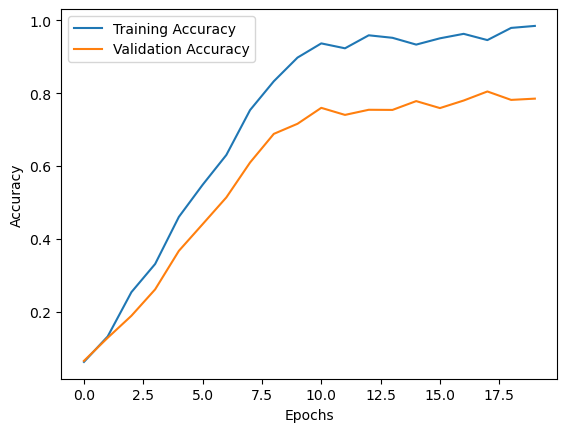

In [197]:
# accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

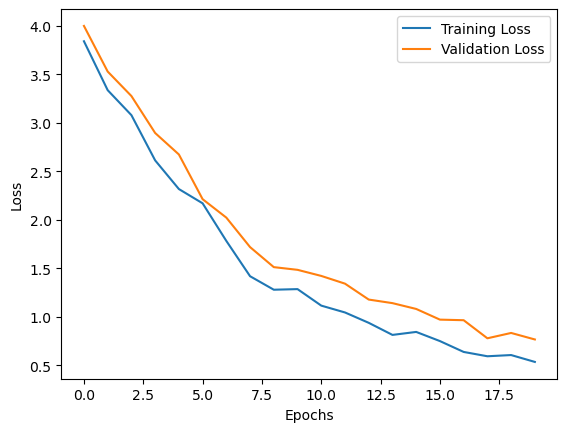

In [198]:
# loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [199]:
model.evaluate(test_x,test_y,batch_size=32)


100/100 [==============================] - 57s 18s/step - loss: 0.3055 - accuracy: 0.9265
[0.3055304837226868, 0.9265168452262878]



In [200]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

# prediction
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

# get classification report
print(classification_report(y_pred,test_y))

# get confusion matrix
print(confusion_matrix(y_pred,test_y))

100/100 [==============================] - 57s 18s/step - loss: 0.3055 - accuracy: 0.9265

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       155
           1       0.95      0.91      0.93       175
           2       0.91      0.94      0.92       165
           3       0.93      0.95      0.94       180
           4       0.94      0.92      0.93       160

    accuracy                           0.93       835
   macro avg       0.93      0.93      0.93       835
weighted avg       0.93      0.93      0.93       835

[[144   9   9  12   7]
 [ 10 160   5   7   6]
 [  8   6 155  10   4]
 [ 11   7  10 171   9]
 [  6   8   6  10 147]]


In [202]:
model.save('model.h5')

### Phase III : Abnormality Detection

In [203]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model.h5')

In [204]:
class Chromosome:
    def __init__(self, confidence):
        self.confidence = confidence

def load_metaphase_image(image_path):
    processed_image=process(image_path)
    return processed_image 

def classify_chromosomes(segmented_chromosomes, classification_model):
    # Classify the segmented chromosomes using the provided model.
    classified_chromosomes = []
    for chromosome in segmented_chromosomes:
        confidence = model.predict(chromosome)
        classified_chromosomes.append(Chromosome(confidence))
    return classified_chromosomes

def detect_abnormalities(metaphase_image, classification_model, threshold=None):
    # Step 1: Classify chromosomes
    classified_chromosomes = classify_chromosomes(segmented_chromosomes, classification_model)

    # Step 2: Calculate the threshold based on correct classifications.
    correct_classifications = 0
    total_chromosomes = len(classified_chromosomes)
    
    for chromosome in classified_chromosomes:
        if chromosome.confidence > 0.5: 
            correct_classifications += 1

    if threshold is None:
        # Automatically calculate the threshold based on the number of correct classifications.
        threshold = correct_classifications / total_chromosomes
    
    # Step 4: Count damaged and undamaged chromosomes based on the threshold.
    damaged_count = sum(1 for chromosome in classified_chromosomes if chromosome.confidence > threshold)
    undamaged_count = total_chromosomes - damaged_count

    return damaged_count, undamaged_count, threshold

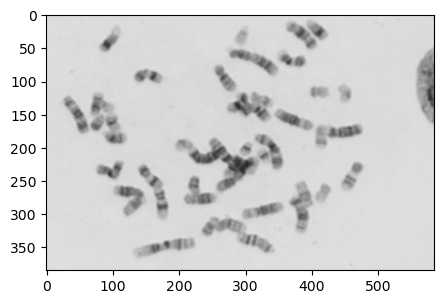

In [207]:
# reading the test image
img = cv2.imread("Data/test.jpg")
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

In [212]:
image_path = "Data/test.jpg"

# abnormality detection
classification_model = "model.h5"
metaphase_image = load_metaphase_image(image_path)
damaged_count, undamaged_count, threshold = detect_abnormalities(metaphase_image, classification_model)
print(f"Damaged chromosomes: {damaged_count}, Undamaged chromosomes: {undamaged_count}")

Damaged chromosomes: 13 Undamaged chromosomes: 32


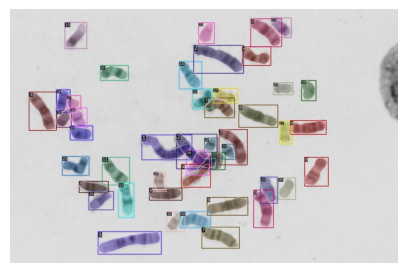

In [213]:
# printing the classified image
bound = classify(image_path)
plt.figure(figsize=(5,5))
plt.imshow(bound)
plt.show()